In [ ]:
# importing libraries
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import requests


## Utilitary Code

In [ ]:
def convolution(image: np.array, kernel: np.array) -> np.array:
  """
    peform a convolution operation image * kernel

    Parameters
      image (np.array): Image represented as a numpy array
      kernel (np.array):  Kernel used to perform the convolution operation (aka Filter)

    Returns
      np.array: 2d np.array that resulted from the convolution operation
  """
  # getting the reflexion of the given kernel
  kernel = np.flipud(np.fliplr(kernel))
  # padding image with 0s
  padded_image = np.pad(image, (1, 1))
  # creating output np.array
  output = np.zeros_like(image, dtype=float)

  # deriving offset based kernel shape
  xOffset = kernel.shape[0]
  yOffset = kernel.shape[1]

  # applying kernel (filter) to the given image
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      # element-wise multiplication of the kernel and the image
      output[x, y] = float((kernel * padded_image[x: x + xOffset, y: y + yOffset]).sum())

  return output


In [ ]:
def plot(originalImg: np.array, modifiedImg: np.array):
  """
    Display the given images side by side

    Parameters
      ----------
      originalImg (np.array): the original image represented as a numpy array
      modifiedImg (np.array): the updated image represented as a numpy array
  """
  _, ax = plt.subplots(1, 2, figsize=(12, 6))
  ax[0].imshow(originalImg, cmap='gray')
  ax[1].imshow(modifiedImg, cmap='gray');

In [ ]:
def createEdgesDetector(operator: str):
  """
    Factory edge detector that crea  
    Parameters
      operator (str): edge detector (avaiable prewitt, sobel, and laplacian)

    Returns:
      Function: desired edge detector

    Raises:
      ValueError: if operator is None or not in (prewitt, solbel, and laplacian)
  """

  # raising error if a falsy operator is provided
  if operator == None:
    raise ValueError('operator is required and cannot be None')
  
  # normalizing operator
  operator = operator.lower()

  # defining supported operators and their respectic masks/filters/kernels
  masksByOperator = {
      'prewitt': {
          'x': np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]),
          'y': np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])
      },
      'sobel': {
          'x': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
          'y': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
      },
      'laplacian': {
          'x': np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),
          'y': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
      }
  }

  # validating that given operator is valid
  if not operator in masksByOperator:
    raise ValueError(f'{operator} is not a valid operator (available options prewitt, sobel, and laplacian)')

  # getting kernel
  KERNEL = masksByOperator[operator]
  
 
  def edgeDetector(imageURI: str): 
    """
      detects edges in the given image
      
      Parameters:
        imageURI (str): absolute URL to the image

      Raises:
        ValueError: if imageURI is None
    """
    if imageURI == None:
      raise ValueError('imageURI is required and cannot be None')

    # loading image
    response = requests.get(imageURI)
    img = Image.open(BytesIO(response.content))
    #urllib.request.urlretrieve(imageURI, imageName)
    #img = Image.open(imageName)

    # converts image to grayscale
    grayScaledImage = ImageOps.grayscale(img)

    # defining filters (aka kernel)
    KERNEL_X = KERNEL['x']
    KERNEL_Y = KERNEL['y']

    # "casting" image as np.array
    grayScaledImageData = np.array(grayScaledImage)

    # applying prewitt filter for the X axis
    Gx = convolution(grayScaledImageData, KERNEL_X) 

    # applying prewitt filter for the Y axis
    Gy = convolution(grayScaledImageData, KERNEL_Y) 

    # computing the gradient magnitude
    G = np.sqrt(np.power(Gx, 2) + np.power(Gy, 2)) 

    # plotting image
    plot(img, G)
    

  return edgeDetector 


In [ ]:
TARGET_IMAGE_URI = 'https://df6asyv2kv4zi.cloudfront.net/what-are-laplacian-derivatives-of-image-opencv/images/chess.jpg'

# Edge Detection

## Prewitt

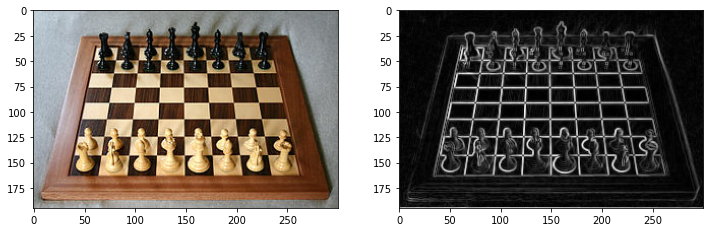

In [ ]:
createEdgesDetector('prewitt')(TARGET_IMAGE_URI)

## Sobel

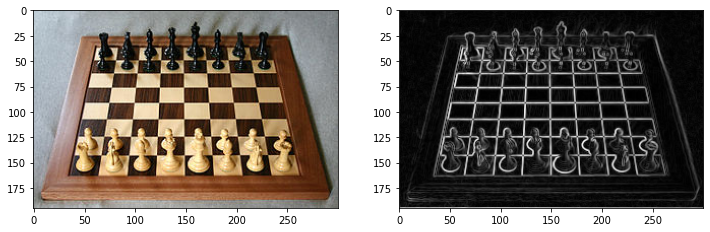

In [ ]:
createEdgesDetector('sobel')(TARGET_IMAGE_URI)

## Laplacian

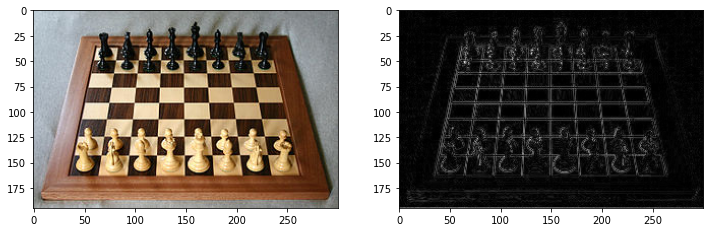

In [ ]:
createEdgesDetector('laplacian')(TARGET_IMAGE_URI)

## Prewitt, Sobel, and Laplacian matchup

The journal article "Comparative Analysis of Common Edge Detection Techniques in
Context of Object Extraction" addresses a comparative study of various edge detection techniques with regard to remote sensing satellite images from the following sources:
* Indian remote Sensiing Satellite (IRS)
* Sensors LISS-III/LISS-IV
* Cartosat-I
* Google Earth

The comparison includes the edge detection techniques that have been addressed above and others like Canny, Roberts, and Zero Crossing.

After performing a series of experiments, the journal put up the following result


| Operator | Time | Space | Noise sensivity | False Edges |
| --- | --- | --- | --- | --- |
| Sobel | lower | high | Less sensivity | More |
| Canny | high | high | Least sensivity | Least |
| Robert | high | high | Sensivity | More |
| Prewitt | low | lower | Least sensivity | More |
| Laplacian | low | least | Least sensivity | More |
| Zero Crossing | low | less | Least sensivity | More |

Based on the information displayed above, the method that is the most efficient in terms of time and space complexity is **Laplacian**.

### Reference

S. Kumar, A. K. Upadhyay, P. Dubey and S. Varshney, "Comparative analysis for Edge Detection Techniques," 2021 International Conference on Computing, Communication, and Intelligent Systems (ICCCIS), Greater Noida, India, 2021, pp. 675-681, doi: [10.1109/ICCCIS51004.2021.9397225](https://arxiv.org/pdf/1405.6132.pdf).

# Image enhancement


Implementa un algoritmos de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.


Buscar una aplicación médica (en el libro de Gonzalez viene varios ejemplos de imágenes PET) y hacer mejoramiento usando la técnica de de la Figura 3.43 combinando diferentes etapas de procesamiento de imagenes
